In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('overall_log.csv', index_col=False)

def get_df(df, model_name, bit):
    return df[(df['Model Name'] == model_name) & (df['Bits']==bit)]

In [3]:
bit_list = [3, 4, 5]
model_names = ['alexnet', 'vgg16', 'resnet18', 'resnet50', 'googlenet']

In [4]:
df

,Model Name,Dataset,Quantization Batch Size,Original Top1 Accuracy,Quantized Top1 Accuracy,Original Top5 Accuracy,Quantized Top5 Accuracy,Bits,Alphabet_Scalar,Percentile,Include 0,Retain_rate,Seed,Author
0,alexnet,ILSVRC2012,32,0.56522,0.08100,0.79066,0.22312,3,1.10,1.0,True,0.25,0,Yixuan
1,alexnet,ILSVRC2012,64,0.56522,0.28532,0.79066,0.53766,3,1.10,1.0,True,0.25,0,Yixuan
2,alexnet,ILSVRC2012,128,0.56522,0.42292,0.79066,0.68394,3,1.10,1.0,True,0.25,0,Yixuan
3,alexnet,ILSVRC2012,256,0.56522,0.47830,0.79066,0.73028,3,1.10,1.0,True,0.25,0,Yixuan
4,alexnet,ILSVRC2012,512,0.56522,0.50204,0.79066,0.75004,3,1.10,1.0,True,0.25,0,Yixuan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,googlenet,ILSVRC2012,64,0.69778,0.59992,0.89530,0.83296,5,1.41,1.0,True,0.25,0,Yixuan
83,googlenet,ILSVRC2012,128,0.69778,0.65848,0.89530,0.87066,5,1.41,1.0,True,0.25,0,Yixuan
84,googlenet,ILSVRC2012,256,0.69778,0.67276,0.89530,0.88234,5,1.41,1.0,True,0.25,0,Yixuan
85,googlenet,ILSVRC2012,512,0.69778,0.68372,0.89530,0.88486,5,1.41,1.0,True,0.25,0,Yixuan


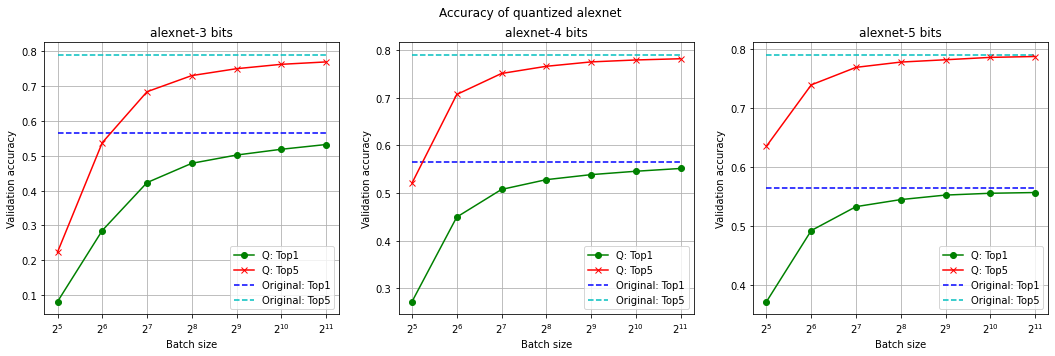

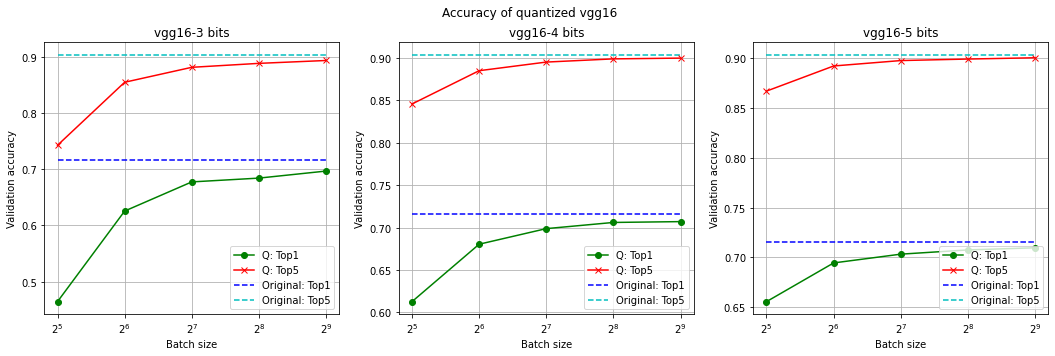

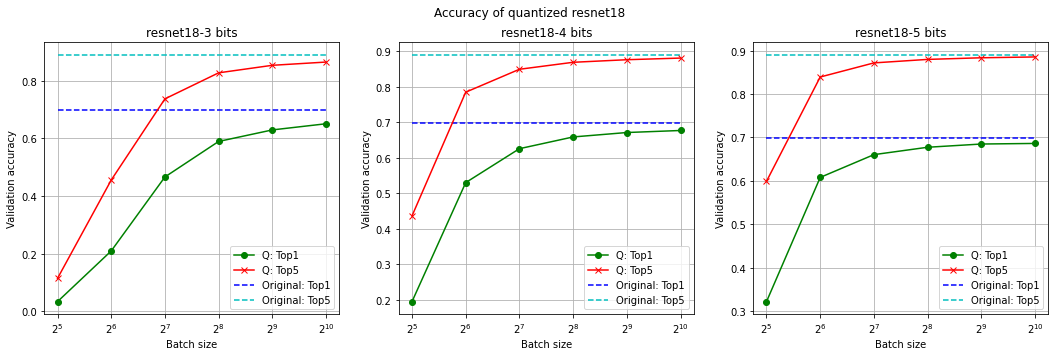

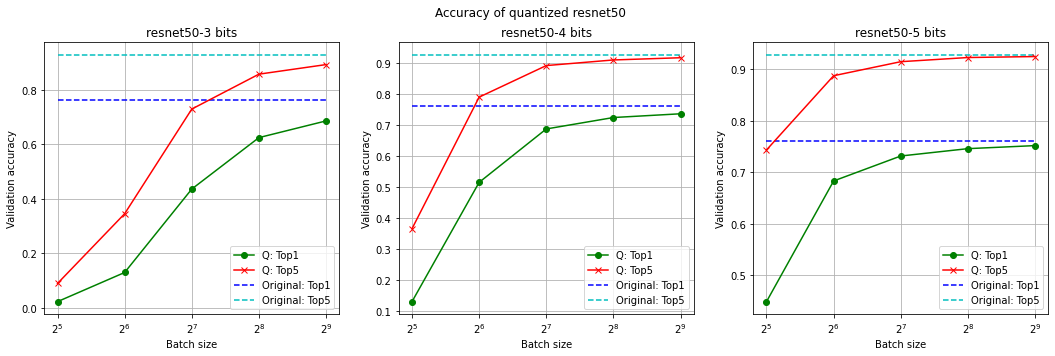

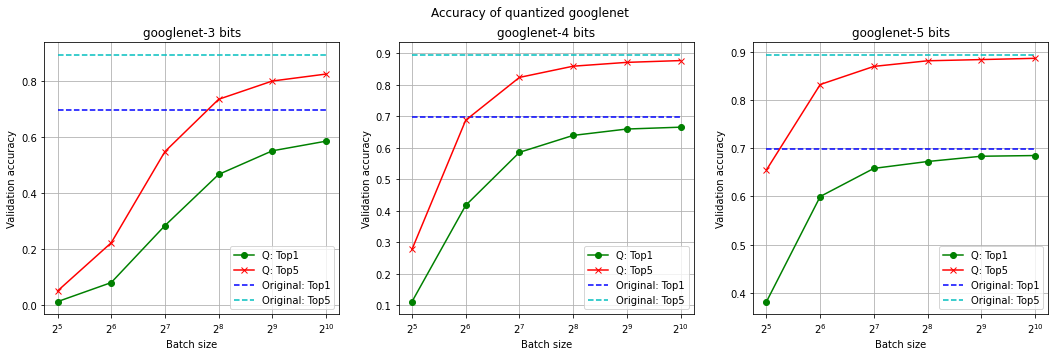

In [10]:
for i, model in enumerate(model_names):
    fig = plt.figure(figsize=(18, 5))
    for j, bit in enumerate(bit_list):
        ax = fig.add_subplot(1, len(bit_list), j+1)
        temp_df = get_df(df, model, bit).sort_values(by=['Quantization Batch Size'])
        batch_sizes = list(temp_df.iloc[:, 2])
        ax.plot(batch_sizes, temp_df.iloc[:, 4], '-o', color='g', label='Q: Top1')
        ax.plot(batch_sizes, temp_df.iloc[:, 6], '-x', color='r', label='Q: Top5')
        ax.hlines(y=temp_df.iloc[0, 3], xmin=batch_sizes[0], xmax=batch_sizes[-1],
                  label='Original: Top1', linestyles='--', color='b'
                  )
        ax.hlines(y=temp_df.iloc[0, 5], xmin=batch_sizes[0], xmax=batch_sizes[-1],
                  label='Original: Top5', linestyles='--', color='c'
                  )
        ax.set_xscale('log', base=2)
        ax.legend(loc='lower right')
        ax.grid()
        ax.set_xlabel('Batch size')
        ax.set_ylabel('Validation accuracy')
        ax.set_title(f'{model}-{bit} bits')
    plt.suptitle(f'Accuracy of quantized {model}')
    plt.savefig(f'Accuracy of quantized {model}.jpg')